In [1]:
import pandas as pd
import datetime
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
wallet = "BXjJ8aCCqHtYcMvbGa9yw62qkhYfBczLSMFkKH1NBvTG"

In [4]:
def import_and_concatenate_csvs(folder_path):
    # List to hold dataframes
    dataframes = []

    # Iterate over all files in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            # Read the CSV file and append to the list
            df = pd.read_csv(os.path.join(folder_path, filename))
            dataframes.append(df)
    
    if dataframes:
        # Concatenate all dataframes
        wallet = pd.concat(dataframes, ignore_index=True)
        
        # Remove duplicates
        wallet.drop_duplicates(inplace=True)
        
        return wallet
    else:
        raise ValueError("No CSV files found in the folder")

In [5]:
df = import_and_concatenate_csvs(wallet)

In [6]:
df = df [(df ['From'] == "5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1") | (df ['To'] == "5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1")]

In [7]:
df ['Amount'] = df ['Amount'].astype (int)/(10**9)
df ['Decimals'] = df ['Decimals'].astype (int)

In [8]:
results = pd.DataFrame (columns = ['Token','Data','Duração (min)','Compra (SOL)','Venda (SOL)','Resultado (SOL)','Estado','Percentual','Resultado ($)'])
for address in list (df ['TokenAddress'].unique ()):
    token = df [df ['TokenAddress'] == address]
    ids = []
    for time in list (token ['Time'].unique ()):
        mask = (df ['Time'] == time) & (df ['TokenAddress'] == "So11111111111111111111111111111111111111112")
        ids.append (df [mask].index [0])
    trades = df.loc [ids]

    ids = list (trades [trades ['To'] == "5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1"].index)
    for buys in ids:
        valid_ids = [valid for valid in list (trades.index) if valid <= buys]
        trade = trades.loc [valid_ids]

        if len (trade [(trade ['From'] == "5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1")]) > 0 and len (trade [(trade ['To'] == "5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1")]) > 0:
            date = trade [(trade ['From'] == "5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1")]['Time'].min ()
            date = datetime.datetime.fromtimestamp(date).strftime('%Y-%m-%d')
            token = address
            time = (trade [(trade ['From'] == "5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1")]['Time'].min () - trade [(trade ['To'] == "5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1")]['Time'].min ())/60
            sold = trade [(trade ['From'] == "5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1")]['Amount'].sum ()
            bought = trade [(trade ['To'] == "5Q544fKrFoe6tsEbD7S8EmxGTJYAKtTVhAW5Q5pge4j1")]['Amount'].sum ()
            profit = sold - bought
            result = 'Lucro' if profit > 0 else 'Prejuízo'
            percentage = round (100*profit/bought,2)
            dollars = round (profit*138.89,2)
            results.loc [len (results)] = [token,date,time,bought,sold,profit,result,percentage,dollars]

In [9]:
df = results [results ['Token'] != "So11111111111111111111111111111111111111112"]

C:\Users\ferna\AppData\Local\Temp\ipykernel_5452\1753626948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data'] = pd.to_datetime(df['Data'])


Statistics:
                                 Data  Duração (min)  Compra (SOL)  \
count                            106     106.000000    106.000000   
mean   2024-06-13 05:12:27.169811200     734.938050      0.259906   
min              2024-06-01 00:00:00       0.083333      0.100000   
25%              2024-06-13 00:00:00       4.041667      0.100000   
50%              2024-06-15 00:00:00      13.508333      0.250000   
75%              2024-06-16 00:00:00     118.258333      0.250000   
max              2024-06-18 00:00:00   17121.100000      2.250000   
std                              NaN    2873.751221      0.255084   

       Venda (SOL)  Resultado (SOL)  Percentual  Resultado ($)  
count   106.000000       106.000000  106.000000     106.000000  
mean      0.291815         0.031910   16.462736       4.431887  
min       0.004430        -0.398676  -95.570000     -55.370000  
25%       0.118532        -0.081949  -52.607500     -11.382500  
50%       0.180693         0.052070   30

C:\Users\ferna\AppData\Local\Temp\ipykernel_5452\1753626948.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)


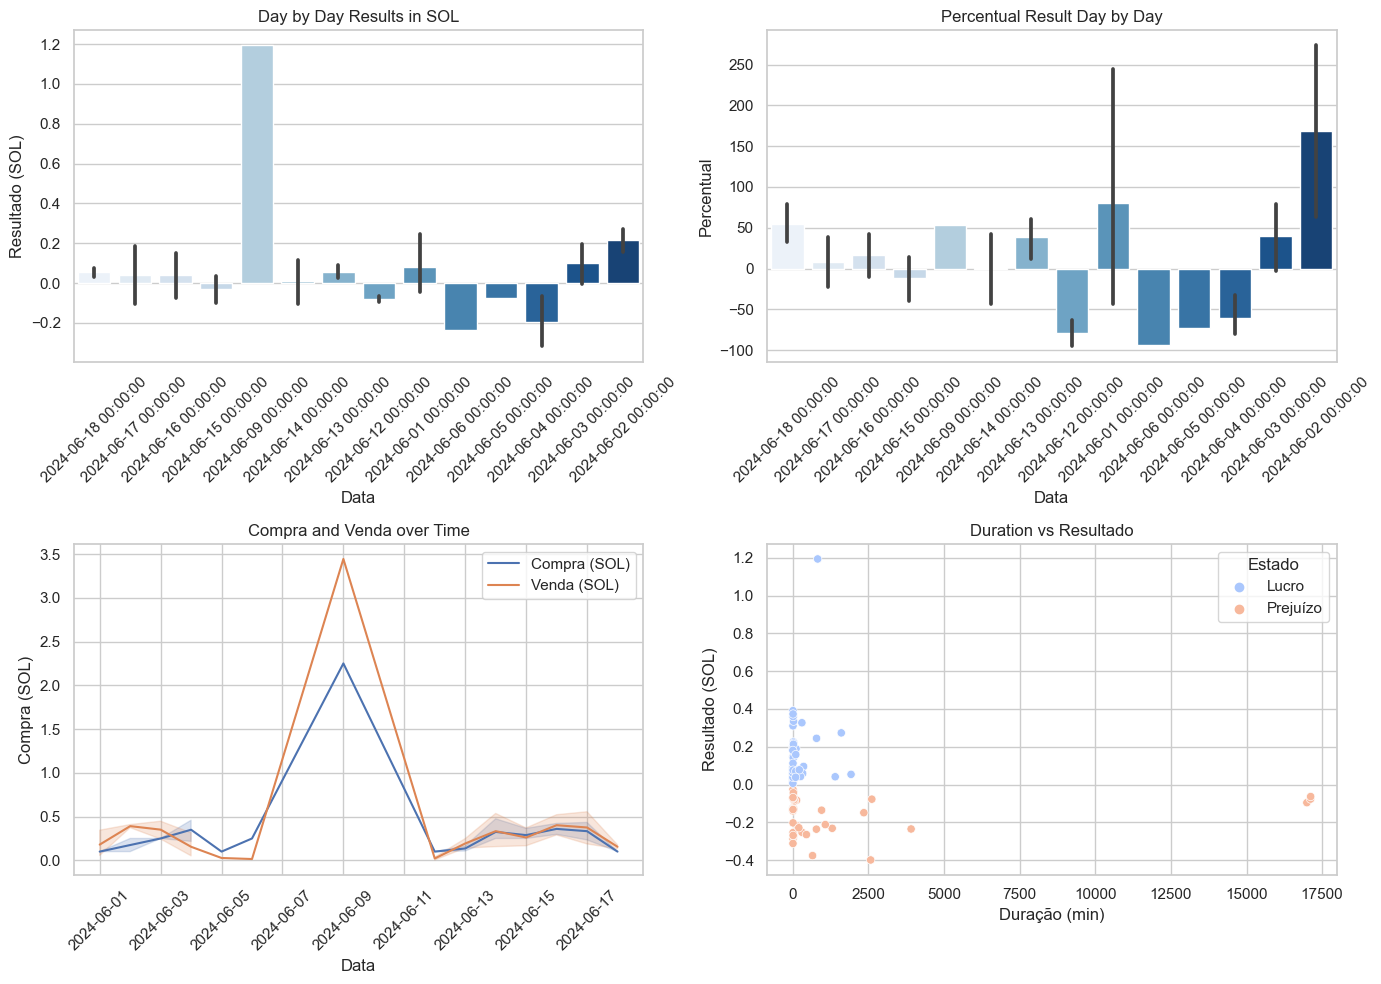

In [10]:
# Convert 'Data' column to datetime format
df['Data'] = pd.to_datetime(df['Data'])

# Calculate statistics
stats = df.describe()

# Print statistics
print("Statistics:\n", stats)

# Set up the seaborn style
sns.set(style="whitegrid")

# Create the charts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot showing day by day results in tones of blue
sns.barplot(x='Data', y='Resultado (SOL)', data=df, palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Day by Day Results in SOL')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Plot the percentual result comparison
sns.barplot(x='Data', y='Percentual', data=df, palette='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Percentual Result Day by Day')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Line plot for Compra and Venda over time
sns.lineplot(x='Data', y='Compra (SOL)', data=df, label='Compra (SOL)', ax=axes[1, 0])
sns.lineplot(x='Data', y='Venda (SOL)', data=df, label='Venda (SOL)', ax=axes[1, 0])
axes[1, 0].set_title('Compra and Venda over Time')
axes[1, 0].legend()
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Scatter plot for duration vs result
sns.scatterplot(x='Duração (min)', y='Resultado (SOL)', hue='Estado', palette="coolwarm", data=df, ax=axes[1, 1])
axes[1, 1].set_title('Duration vs Resultado')

# Adjust layout
plt.tight_layout()
plt.show()